# Michell Luiz Costalonga
# Exercício 1

Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

Probabilidade de sobreviver sendo: 
Homem:  19.0  %
Mulher:  74.0  %

Gerando gráficos.


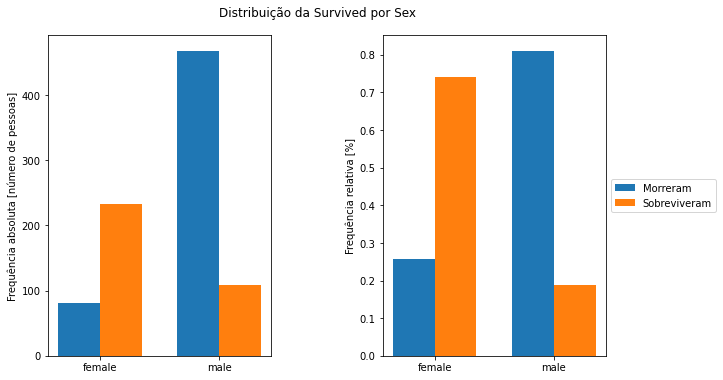


Tabela de frequência absoluta que mostra a quantidade de pessoas (homens e mulheres) que sobreviveram e morreram: 
          0    1
Sex             
female   81  233
male    468  109

Tabela de frequência relativa que mostra a porcentagem de pessoas (homens e mulheres) que sobreviveram e morreram: 
               0         1
Sex                       
female  0.257962  0.742038
male    0.811092  0.188908


In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Abrindo o arquivo .CSV com as informações
df = pd.read_csv("titanic.csv")
df_linhas, df_colunas = df.shape

# Imprimindo as 5 primeiras linhas do arquivo
df.head()

# Imprime a probabilidade de sobreviver ao acidente de acordo com o sexo.
prob_homem = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_mulher = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print('Probabilidade de sobreviver sendo: ')
print('Homem: ', (round(prob_homem,2)*100), ' %') 
print('Mulher: ', (round(prob_mulher,2)*100), ' %')

# Criando uma nova df filtrando a tabela df por grupo pela coluna "Sex" e pela condição 'Survived'
# .unstack(): permite o retorno de um df com novos rótulos de coluna,
#             cuja a coluna mais a esquerda consiste nos índices pivotados.
# lambda x: x.Survived.value_counts(): Realiza a contagem por grupo dos que sobreviveram.
# lambda x: x.Survived.value_counts()/x.shape[0]: Realiza a contagem por grupo e divide pelo número total de
#                                                 linhas (pessoas) para retornar o valor em porcentagem

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()
df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

# Rótulos para as legendas dos gráficos
labels = list(df_sex.index)

morreram = df_sex[0].values #valores para construção do grafico de barras
sobreviveram = df_sex[1].values #valores para construção do grafico de barras

morreram_prob = df_sex_prob[0].values #valores para construção do grafico de barras (porcentagem)
sobreviveram_prob= df_sex_prob[1].values #valores para construção do grafico de barras (porcentagem)

x = np.arange(len(labels))  # Posição dos labels
width = 0.35  # largura das barras

# Construção do frame, criando figura e eixos
print('\nGerando gráficos.')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#valores para construção do gráfico de barras
ax[0].bar(x - width/2, morreram, width, label='Morreram')
ax[0].bar(x + width/2, sobreviveram, width, label='Sobreviveram')

ax[1].bar(x - width/2, morreram_prob, width, label='Morreram')
ax[1].bar(x + width/2, sobreviveram_prob, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
fig.suptitle('Distribuição da Survived por Sex') #titulo

# Adicionando legenda aos eixos-y
ax[0].set_ylabel('Frequência absoluta [número de pessoas]') # legenda eixo y (posição 1 - esquerda)
ax[1].set_ylabel('Frequência relativa [%]') # legenda eixo y (posição 2 - direita)

# Substituindo os valores dos eixos pelos rótulos (female e male)
for i in range(len(ax)):
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)
    i += 1

# Adicionando a legenda fora do gráfico
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotando o gráfico
#fig.tight_layout()
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=1.5, wspace=0.5)
plt.show()

# Determinando a frequência absoluta e relativa das pessoas que sobreviveram (1).
# Gera tabela de frequencia absoluta
print('\nTabela de frequência absoluta que mostra a quantidade de pessoas (homens e mulheres) que sobreviveram e morreram: ')
print(df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack())

# Gera tabela de frequencia relativa
print('\nTabela de frequência relativa que mostra a porcentagem de pessoas (homens e mulheres) que sobreviveram e morreram: ')
print(df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack())

**Qual sua conclusão a partir dos dados acima?**

**Você vê algum indicativo de relação entre ter sobrevivido e o sexo? Qual conclusão você reforça com esses gráficos?**

Devido a grande diferença dos valores apresentados na probabilidade de sobreviver de acordo com o sexo, percebe-se que há influência do parâmetro 'Sex'. Os gráficos confirmam isso visualmente. Relativamente falando, vemos que pessoas do sexo masculino apresentam uma probabilidade de, aproximadamente, 80 % de morrer, enquanto para pessoas do sexo feminino, esse valor é de 25 %.

In [2]:
# Calculando o Chi-Quadrado

# 1) Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))
print('\nDistribuição geral da variável "Survived": ')
dist_geral


Distribuição geral da variável "Survived": 


,Survived
0,0.62
1,0.38


In [3]:
# 2) Tabelas de frequencia absoluta e relativa:

df_sex = df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()
print('\nDistribuição geral de pessoas que sobreviveram ou não, agrupadas por "Sex": ')
df_sex


Distribuição geral de pessoas que sobreviveram ou não, agrupadas por "Sex": 


,0,1
Sex,,
female,81,233
male,468,109


In [4]:
df_sex_prob = df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()
print('\nDistribuição relativa de pessoas que sobreviveram ou não, agrupadas por "Sex": ')
df_sex_prob


Distribuição relativa de pessoas que sobreviveram ou não, agrupadas por "Sex": 


,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [5]:
# 3) Adicionar o total para cada sexo na tabela de frequência absoluta:

df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values
df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [6]:
# 4) Tabela de frequência esperada:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [7]:
# 5) Cálculo do chi-quadrado

# calculo dos desvios:

desvios = (df_sex.iloc[:,:2].values - df_esp.values)

print(desvios)

# calculo dos desvios ao quadrado:

desvios_ao_quadaro = desvios**2

# calculo do chi-quadrado:

chi_quad = sum(sum(desvios_ao_quadaro/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad)

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303


**O que significa o valor do chi-quadrado de Pearson?**

**Quais foram as suas conclusões?**

O chi-quadrado de Pearson é usado para determinar se há relação entre duas (ou mais) variáveis entre si. Quanto maior o valor, maior será a correlação entre as variáveias. No caso em questão, é possível observar que há uma alta correlação entre a variável 'Sex' e a variável 'Survived'. 

Com isso em mente, 'Sex' poderia ser usado como uma variável em um modelo de Machine Learning para prever o comportamento de 'Survived'.

# Exercício 3

Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:


1 - Qual o número de reclamações por Estado?

    - Calcular a quantidade de reclamações de acordo com os estados.

2 - Qual a quantidade de reclamações por sexo?

    - Calcular a quantidade de reclamações de acordo com o sexo do consumidor.

3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

    - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
    - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
    - Lembre-se que aqui você estará testando a seguinte hipótese: 
    
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)

4 - Proporção de reclamações registradas e não respondidas.

    - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 

    - Proponha outras hipóteses e verifique-as (no mínimo duas).


**Importante**: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.


_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [8]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [9]:
# Lendo o arquivo com os dados
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

# Configurando o pandas para mostrar todas as colunas do arquivo
pd.set_option('display.max_columns', None)

print('O arquivo possui %d linhas e %d colunas.' %(df.shape[0], df.shape[1]))

#print('Imprimindo as cinco primeiras linhas do arquivo: ')
#df.head()

O arquivo possui 43987 linhas e 38 colunas.


In [10]:
# Renomeando colunas
df.columns = ['Gestor', 'CanalOrigem', 'Regiao', 'UF', 'Cidade', 'Sexo', 'FaixaEtaria', 'AnoAbertura', 'MesAbertura', 'DataAbertura', 'HoraAbertura', 'DataResposta', 'HoraResposta', 'DataAnalise', 'HoraAnalise', 'DataRecusa', 'HoraRecusa', 'DataFinalizacao', 'HoraFinalizacao', 'PrazoResposta', 'PrazoAnaliseGestor', 'TempoResposta', 'NomeFantasia', 'SegmentoMercado', 'Area', 'Assunto', 'GrupoProblema', 'Problema', 'ComoComprouContratou', 'ProcurouEmpresa', 'Respondida', 'Situacao', 'AvaliacaoReclamacao', 'NotaConsumidor', 'AnaliseRecusa', 'EdicaoConteudo', 'InteracaoGestor', 'Total']
#df.head()

In [11]:
# Análise de preenchimento de dados
# Avaliar o que são os nulos com a área responsável pela base / técnicas de preenchimento

print("Total reclamações:", df.Total.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

Total reclamações: 43987

Total de informação nula na base: 275157

Total de nulos por variável:
 DataAnalise            42034
HoraAnalise            42034
PrazoAnaliseGestor     42034
AnaliseRecusa          41941
DataRecusa             41921
HoraRecusa             41921
NotaConsumidor         15360
DataResposta            2026
HoraResposta            2026
TempoResposta           2026
AvaliacaoReclamacao     1834
dtype: int64

Total de linhas completamente preenchidas: 163


Devido à quantidade de dados nulos, as colunas 'DataAnalise', 'HoraAnalise', 'PrazoAnaliseGestor', 'AnaliseRecusa', 'DataRecusa' e 'HoraRecusa' serão excluídas.

In [12]:
col_excluidas = ['DataAnalise', 'HoraAnalise', 'PrazoAnaliseGestor', 'AnaliseRecusa', 'DataRecusa', 'HoraRecusa']
for item in col_excluidas:
    df.drop(item, axis=1, inplace=True)

# Nova análise:
print("Total reclamações:", df.Total.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

df.head(2)

Total reclamações: 43987

Total de informação nula na base: 23272

Total de nulos por variável:
 NotaConsumidor         15360
DataResposta            2026
HoraResposta            2026
TempoResposta           2026
AvaliacaoReclamacao     1834
dtype: int64

Total de linhas completamente preenchidas: 28512


,Gestor,CanalOrigem,Regiao,UF,Cidade,Sexo,FaixaEtaria,AnoAbertura,MesAbertura,DataAbertura,HoraAbertura,DataResposta,HoraResposta,DataFinalizacao,HoraFinalizacao,PrazoResposta,TempoResposta,NomeFantasia,SegmentoMercado,Area,Assunto,GrupoProblema,Problema,ComoComprouContratou,ProcurouEmpresa,Respondida,Situacao,AvaliacaoReclamacao,NotaConsumidor,EdicaoConteudo,InteracaoGestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,19:05:11,02/07/2014,19:30:10,22/07/2014,23:48:04,07/07/2014,5.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança de compra/saque não reconhecido,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,13:35:22,17/06/2014,08:44:35,17/06/2014,09:24:10,21/06/2014,6.0,Magazineluiza.com,Comércio Eletrônico,Produtos de Telefonia e Informática,Aparelho celular,Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,N,N,1


A variável 'NotaConsumidor' não foi excluída pois depende se a reclamação foi avaliada, ou não.

In [13]:
# Verificando os tipos dos dados.

df.dtypes

Gestor                   object
CanalOrigem              object
Regiao                   object
UF                       object
Cidade                   object
Sexo                     object
FaixaEtaria              object
AnoAbertura               int64
MesAbertura               int64
DataAbertura             object
HoraAbertura             object
DataResposta             object
HoraResposta             object
DataFinalizacao          object
HoraFinalizacao          object
PrazoResposta            object
TempoResposta           float64
NomeFantasia             object
SegmentoMercado          object
Area                     object
Assunto                  object
GrupoProblema            object
Problema                 object
ComoComprouContratou     object
ProcurouEmpresa          object
Respondida               object
Situacao                 object
AvaliacaoReclamacao      object
NotaConsumidor          float64
EdicaoConteudo           object
InteracaoGestor          object
Total   

**Tipos de dados**

Quantitativas:
- Contínuas: TempoResposta, NotaConsumidor

Qualitativas (categóricas):
- Nominais: Sexo, AvaliacaoReclamacao, ProcurouEmpresa (booleano), Area, Assunto
- Ordinais: AnoAbertura, MesAbertura, FaixaEtaria

**1 - Qual o número de reclamações por Estado?**

- Calcular a quantidade de reclamações de acordo com os estados.

Para avaliar o número de reclamações por estado, usaremos a função groupby.

In [14]:
# Criando uma nova dataframe onde mostra a soma de reclamações por estado (UF):
df_reclamacoes_UF = df.groupby('UF').apply(lambda x: x.Total.value_counts())
df_reclamacoes_UF_rel = df.groupby('UF').apply(lambda x: x.Total.value_counts())/df.shape[0]
df_reclamacoes_UF.head()

Total,1
UF,
AC,449
AL,104
AM,291
AP,18
BA,2443


Podemos criar um gráfico de barras para visualizar o resultado como forma alternativa.

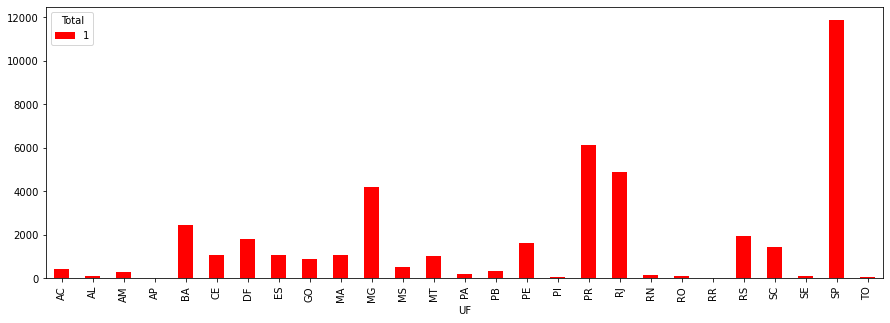

In [15]:
# Criando um gráfico de barras

ax = df_reclamacoes_UF.plot.bar(rot=90, figsize=(15,5), color='r')

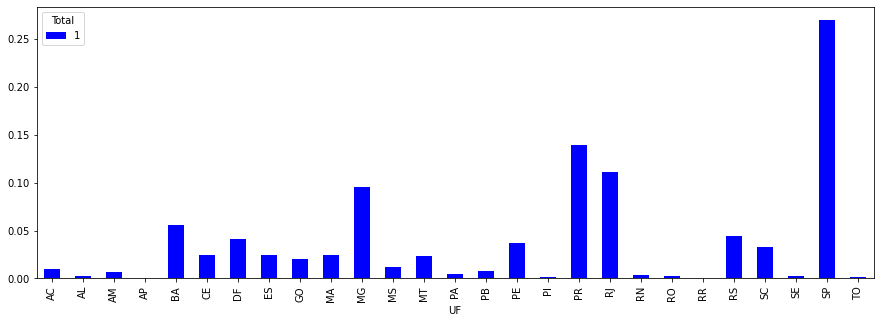

In [16]:
# Criando um gráfico de barras com base nos dados relativos.

# Criando um gráfico de barras

ax = df_reclamacoes_UF_rel.plot.bar(rot=90, figsize=(15,5), color='b')

Percebe-se que o estado de São Paulo apresenta a maior quantidade de reclamações. Isso pode ser gerado em relação à quantidade de habitantes ou em relação a quantidade de serviços ofertados.

Pontos a se pensar:

**O que pode ter causado esse maior número de reclamações em SP?**

**Quais fatores podem influenciar no número de reclamações?** 

**2 - Qual a quantidade de reclamações por sexo?**

- Calcular a quantidade de reclamações de acordo com o sexo do consumidor.

In [17]:
# Criando uma nova dataframe onde mostra a soma de reclamações por sexo:
df_reclamacoes_sexo = df.groupby('Sexo').apply(lambda x: x.Total.value_counts())
df_reclamacoes_sexo_rel = df.groupby('Sexo').apply(lambda x: x.Total.value_counts())/df.shape[0]
numReclamacaoMulher, numReclamacaoHomem = df_reclamacoes_sexo.values
numReclamacaoMulherRel, numReclamacaoHomemRel = df_reclamacoes_sexo_rel.values*100.0
df_reclamacoes_sexo

Total,1
Sexo,
F,16092
M,27895


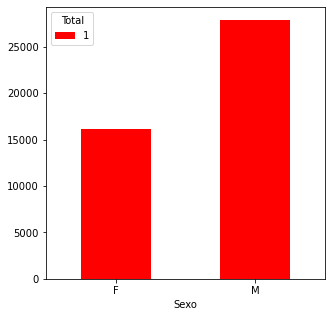

In [18]:
# Criando um gráfico de barras absoluto

ax = df_reclamacoes_sexo.plot.bar(rot=0, figsize=(5,5), color='r')

In [19]:
print('O número de reclamações feitas por mulheres e homens é: ')
print('Mulheres: %d \nHomens: %d' %(numReclamacaoMulher, numReclamacaoHomem))
print('O número total de reclamações é %d' %(numReclamacaoHomem + numReclamacaoMulher))

O número de reclamações feitas por mulheres e homens é: 
Mulheres: 16092 
Homens: 27895
O número total de reclamações é 43987


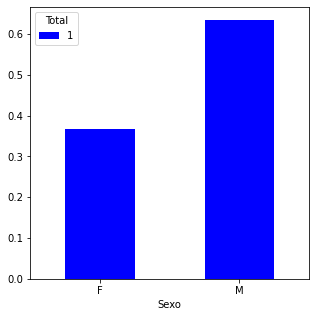

In [20]:
# Criando um gráfico de barras relativo

ax = df_reclamacoes_sexo_rel.plot.bar(rot=0, figsize=(5,5), color='b')

In [21]:
print('O número de reclamações feitas por mulheres e homens, em porcentagem, é: ')
print('Mulheres: %.2f %% e \nHomens: %.2f %%' %(numReclamacaoMulherRel, numReclamacaoHomemRel))

O número de reclamações feitas por mulheres e homens, em porcentagem, é: 
Mulheres: 36.58 % e 
Homens: 63.42 %


**3 - O tempo de resposta tem alguma correlação com a nota do consumidor?**

- Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
- Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
- Lembre-se que aqui você estará testando a seguinte hipótese:

**DÚVIDA: As hipóteses estavam invertidas. Mudei, pois, lembro que quando queremos avaliar se duas variáveis tem relação, a hipótese de nulidade afirma que não há relação entre as mesmas. Ao final do arquivo coloquei algumas dúvidas, se puder olhar, agradeço muito.**

    - h0 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese nula)
    - h1 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese alternativa)

In [22]:
# Criando uma tabela

#Deletando linhas onde o tempo de resposta é nulo
#df = df.dropna(how='any',axis=0)
df = df.dropna(subset=['TempoResposta'], axis=0)

df_tempo_nota = df.groupby('TempoResposta').apply(lambda x: x.NotaConsumidor.value_counts()).unstack()
#df_tempo_nota.fillna(0, inplace=True)
print('Imprimindo a tabela com a frequência absoluta de reclamações.')
df_tempo_nota

Imprimindo a tabela com a frequência absoluta de reclamações.


,1.0,2.0,3.0,4.0,5.0
TempoResposta,,,,,
0.0,150.0,27.0,131.0,106.0,351.0
1.0,461.0,87.0,241.0,352.0,773.0
2.0,467.0,113.0,249.0,311.0,727.0
3.0,487.0,96.0,218.0,301.0,667.0
4.0,495.0,92.0,236.0,323.0,651.0
5.0,548.0,125.0,226.0,328.0,654.0
6.0,575.0,119.0,250.0,336.0,720.0
7.0,819.0,166.0,346.0,430.0,858.0
8.0,1298.0,256.0,464.0,487.0,990.0


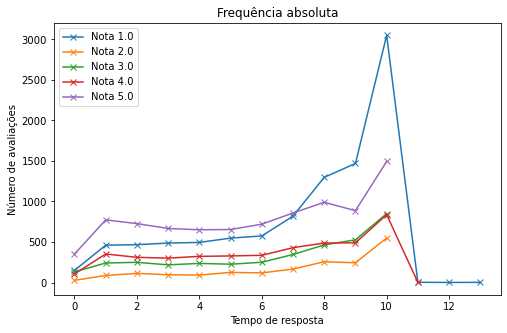

In [23]:
# Criando o frame e definindo o tamanho da figura.
fig, ax = plt.subplots(figsize=(8,5))

# Inserindo os dados no gráfico 1
for item in df_tempo_nota.columns:
    ax.plot(df_tempo_nota.index.values, df_tempo_nota[item], marker='x', label='Nota ' + str(item))

# Inserindo título e nome dos eixos x e y para o gráfico 1.
ax.set_title('Frequência absoluta')
ax.set_xlabel('Tempo de resposta')
ax.set_ylabel('Número de avaliações')

# Inserindo legenda
ax.legend(loc='upper left')

# Plotando o gráfico
plt.show()

**Pontos a serem observados**

- Observa-se uma tendência de crescimento na quantidade de avaliações com o aumento do tempo de resposta, independente da nota.
- Para tempos superiores a 10, os usuários não fornecem uma quantidade grande de avaliação (grande parte não faz a avaliação e os que fazem geram poucas amostras).
- Os atendimentos que tiveram nota 1 apresentaram uma grande crescimento na quantidade de avaliação a partir do tempo 7.
- É possível verificar através do gráfico, as notas 1 e 5 apresentaram a maior quantidade de avaliações.
- Não é possível afirmar que o tempo de resposta influencia diretamente na nota do consumidor, ou seja, *o gráfico é inconclusivo em relação a influência do tempo de resposta na nota do consumidor*.

Com isso em mente, devemos buscar outra forma de avaliar o problema.

In [24]:
# Tabelas de frequência absoluta - será usado para o cálculo do chi-quadrado
df_tempo = df.groupby('TempoResposta').apply(lambda x: x.NotaConsumidor.value_counts()).unstack()
df_tempo.fillna(0, inplace=True)
df_tempo_obs = df_tempo.copy()

# Adicionando o total da soma dos elementos em cada linha
df_tempo['total'] = df_tempo.sum(axis=1)

# Adicionando o total da soma dos elementos em cada coluna
df_tempo.loc['total'] = df_tempo.sum()

In [25]:
# Calculando Chi-Quadrado

listaEsperado = []
for i in range(0,len(df_tempo.loc['total'][:5].values)):
    listaEsperado.append((df_tempo.loc['total'][:5].values[i] * df_tempo['total'][:14].values)/df_tempo['total'][:14].values.sum())

df_esperado = pd.DataFrame(listaEsperado).T

listaObservado = []
for i in range(1, df_tempo_obs.shape[1]+1):
    listaObservado.append(df_tempo_obs[i].values)

df_observado = pd.DataFrame(listaObservado).T

In [26]:
desvios = pd.DataFrame((df_tempo_obs.values - df_esperado.values)**2)

desvios = pd.DataFrame(desvios.values / df_esperado.values)

chiQuadrado = desvios.sum().sum()

print('O chiQuadrado calculado é igual a %d.' %(chiQuadrado))

grausLiberdade = (desvios.shape[0] - 1) * (desvios.shape[1] - 1)

print('O número de graus de liberdade é: %d' %(grausLiberdade))

chiCritico = ss.chi2.ppf(1-.05, df=grausLiberdade)

print('O chiQuadrado crítico, para um grau de significância de 5 %% é de: %d' %(chiCritico))

O chiQuadrado calculado é igual a 1147.
O número de graus de liberdade é: 52
O chiQuadrado crítico, para um grau de significância de 5 % é de: 69


Verificamos que o chiQuadrado calculado é superior ao chiQuadrado crítico. Sendo assim, o tempo de resposta apresenta uma boa relação com a nota do consumidor.

### Podemos usar outro método para calcular chiQuadrado:

In [27]:
# Distribuição geral da variável TempoResposta:
dist_geral = pd.DataFrame(round(df.TempoResposta.value_counts()/df.shape[0],5))
dist_geral.sort_index(inplace=True)
dist_geral

,TempoResposta
0.0,0.02293
1.0,0.06103
2.0,0.06110
3.0,0.05877
4.0,0.06141
5.0,0.06444
6.0,0.07114
7.0,0.09823
8.0,0.12726
9.0,0.12955


In [28]:
# Criando um dataframe e adicionando o total de cada linha na coluna 'total'.
df_nota = df.groupby('NotaConsumidor').apply(lambda x: x.TempoResposta.value_counts()).unstack()
df_nota_rel = df.groupby('NotaConsumidor').apply(lambda x: round(x.TempoResposta.value_counts()/x.shape[0],3)).unstack()

# Substituindo os valores nulos (NaN) por 0
df_nota.fillna(0, inplace=True)
df_nota_rel.fillna(0, inplace=True)

# Copiando o dataframe df_nota para os valores observados:
df_nota_obs = df_nota.copy()

# Adicionando a coluna total com a soma de cada linha
df_nota['total'] = df_nota.loc[:5].sum(axis=1)
df_nota_rel['total'] = df_nota_rel.loc[:5].sum(axis=1)

In [29]:
# Imprimindo a tabela com valores absolutos
df_nota

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,total
NotaConsumidor,,,,,,,,,,,,,,,
1.0,150.0,461.0,467.0,487.0,495.0,548.0,575.0,819.0,1298.0,1469.0,3050.0,3.0,1.0,2.0,9825.0
2.0,27.0,87.0,113.0,96.0,92.0,125.0,119.0,166.0,256.0,244.0,549.0,0.0,0.0,0.0,1874.0
3.0,131.0,241.0,249.0,218.0,236.0,226.0,250.0,346.0,464.0,527.0,850.0,0.0,0.0,0.0,3738.0
4.0,106.0,352.0,311.0,301.0,323.0,328.0,336.0,430.0,487.0,490.0,837.0,2.0,0.0,0.0,4303.0
5.0,351.0,773.0,727.0,667.0,651.0,654.0,720.0,858.0,990.0,887.0,1494.0,0.0,0.0,0.0,8772.0


In [30]:
# Imprimindo a tabela com valores relativos
df_nota_rel

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,total
NotaConsumidor,,,,,,,,,,,,,,,
1.0,0.015,0.047,0.048,0.050,0.050,0.056,0.059,0.083,0.132,0.150,0.310,0.0,0.0,0.0,1.000
2.0,0.014,0.046,0.060,0.051,0.049,0.067,0.064,0.089,0.137,0.130,0.293,0.0,0.0,0.0,1.000
3.0,0.035,0.064,0.067,0.058,0.063,0.060,0.067,0.093,0.124,0.141,0.227,0.0,0.0,0.0,0.999
4.0,0.025,0.082,0.072,0.070,0.075,0.076,0.078,0.100,0.113,0.114,0.195,0.0,0.0,0.0,1.000
5.0,0.040,0.088,0.083,0.076,0.074,0.075,0.082,0.098,0.113,0.101,0.170,0.0,0.0,0.0,1.000


In [31]:
# Criando a tabela de valores esperados.
listaEsperado = []
for i in range(0, dist_geral.shape[0]):
    listaEsperado.append(dist_geral.values[i]*df_nota['total'].values)

df_esperado = pd.DataFrame(listaEsperado).T

# Criando a tabela de valores observados.    
listaObservado = []
for i in range(0, df_nota_obs.shape[1]):
    listaObservado.append(df_nota_obs[i].values)

df_observado = pd.DataFrame(listaObservado).T

In [32]:
# Imprimindo a tabela de valores esperados
df_esperado

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,225.28725,599.61975,600.3075,577.41525,603.35325,633.12300,698.95050,965.10975,1250.32950,1272.82875,2396.21925,1.67025,0.19650,0.49125
1,42.97082,114.37022,114.5014,110.13498,115.08234,120.76056,133.31636,184.08302,238.48524,242.77670,457.04986,0.31858,0.03748,0.09370
2,85.71234,228.13014,228.3918,219.68226,229.55058,240.87672,265.92132,367.18374,475.69788,484.25790,911.66082,0.63546,0.07476,0.18690
3,98.66779,262.61209,262.9133,252.88731,264.24723,277.28532,306.11542,422.68369,547.59978,557.45365,1049.45867,0.73151,0.08606,0.21515
4,201.14196,535.35516,535.9692,515.53044,538.68852,565.26768,624.04008,861.67356,1116.32472,1136.41260,2139.40308,1.49124,0.17544,0.43860


In [33]:
# Imprimindo a tabela de valores observados
df_observado

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,150.0,461.0,467.0,487.0,495.0,548.0,575.0,819.0,1298.0,1469.0,3050.0,3.0,1.0,2.0
1,27.0,87.0,113.0,96.0,92.0,125.0,119.0,166.0,256.0,244.0,549.0,0.0,0.0,0.0
2,131.0,241.0,249.0,218.0,236.0,226.0,250.0,346.0,464.0,527.0,850.0,0.0,0.0,0.0
3,106.0,352.0,311.0,301.0,323.0,328.0,336.0,430.0,487.0,490.0,837.0,2.0,0.0,0.0
4,351.0,773.0,727.0,667.0,651.0,654.0,720.0,858.0,990.0,887.0,1494.0,0.0,0.0,0.0


In [34]:
# Calculando os desvios

desvios = pd.DataFrame((df_observado.values - df_esperado.values)**2)

desvios = pd.DataFrame(desvios.values / df_esperado.values)

# Calculando o Chi-Quadrado
chiQuadrado = desvios.sum().sum()

print('O chiQuadrado calculado é igual a %d.' %(chiQuadrado))

grausLiberdade = (desvios.shape[0] - 1) * (desvios.shape[1] - 1)

print('O número de graus de liberdade é: %d' %(grausLiberdade))

chiCritico = ss.chi2.ppf(1-.05, df=grausLiberdade)

print('O chiQuadrado crítico, para um grau de significância de 5 %% é de: %d' %(chiCritico))

O chiQuadrado calculado é igual a 1259.
O número de graus de liberdade é: 52
O chiQuadrado crítico, para um grau de significância de 5 % é de: 69


Assim como no cálculo anterior, o chiQuadrado calculado é superior ao chiQuadrado crítico. Dessa forma, descartamos a hipótese de nulidade. Sendo assim, o tempo de resposta tem relação direta com a nota do consumidor.

**4 - Proporção de reclamações registradas e não respondidas.**

- Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

Para determinar o número de reclamações registradas e não respondidas, devemos usar um filtro nos dados. O filtro deverá selecionar todas as reclamações registradas e não respondidas.

In [35]:
# Lendo o arquivo com os dados
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

# Configurando o pandas para mostrar todas as colunas do arquivo
pd.set_option('display.max_columns', None)

# Renomeando colunas
df.columns = ['Gestor', 'CanalOrigem', 'Regiao', 'UF', 'Cidade', 'Sexo', 'FaixaEtaria', 'AnoAbertura', 'MesAbertura', 'DataAbertura', 'HoraAbertura', 'DataResposta', 'HoraResposta', 'DataAnalise', 'HoraAnalise', 'DataRecusa', 'HoraRecusa', 'DataFinalizacao', 'HoraFinalizacao', 'PrazoResposta', 'PrazoAnaliseGestor', 'TempoResposta', 'NomeFantasia', 'SegmentoMercado', 'Area', 'Assunto', 'GrupoProblema', 'Problema', 'ComoComprouContratou', 'ProcurouEmpresa', 'Respondida', 'Situacao', 'AvaliacaoReclamacao', 'NotaConsumidor', 'AnaliseRecusa', 'EdicaoConteudo', 'InteracaoGestor', 'Total']

col_excluidas = ['DataAnalise', 'HoraAnalise', 'PrazoAnaliseGestor', 'AnaliseRecusa', 'DataRecusa', 'HoraRecusa']
for item in col_excluidas:
    df.drop(item, axis=1, inplace=True)

# Nova análise:
print("Total reclamações:", df.Total.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

print('\nO arquivo possui %d linhas e %d colunas.' %(df.shape[0], df.shape[1]))

df_respondidas = df.groupby('Respondida').apply(lambda x: x.Total.value_counts())
nao_respondidas = round(df[(df.Respondida=='N') & ( df.Total==1)].shape[0] / df[df.Total==1].shape[0],2)*100
respondidas = round(df[(df.Respondida=='S') & ( df.Total==1)].shape[0] / df[df.Total==1].shape[0],2)*100
df_respondidas_rel = np.array([nao_respondidas, respondidas])
df_respondidas['Porcentagem'] = df_respondidas_rel
df_respondidas

Total reclamações: 43987

Total de informação nula na base: 23272

Total de nulos por variável:
 NotaConsumidor         15360
DataResposta            2026
HoraResposta            2026
TempoResposta           2026
AvaliacaoReclamacao     1834
dtype: int64

Total de linhas completamente preenchidas: 28512

O arquivo possui 43987 linhas e 32 colunas.


Total,1,Porcentagem
Respondida,,
N,2026,5.0
S,41961,95.0


Das reclamações registradas, apenas 5 % não foram respondidas.

**5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las.**

- Proponha outras hipóteses e verifique-as (no mínimo duas).

### Hipótese 1:
A solução do problema (AvaliacaoReclamacao) do cliente tem alguma correlação com a nota do consumidor?
   - h0 = "AvaliacaoReclamacao" não tem relação direta com "NotaConsumidor". (Hipótese nula)
   - h1 = "AvaliacaoReclamacao" tem relação direta com "NotaConsumidor". (Hipótese alternativa)

In [36]:
# Criando uma nova dataframe relacionanodo 'AvaliacaoReclamacao' com 'NotaConsumidor':
df_resolvidas = df.groupby('AvaliacaoReclamacao').apply(lambda x: x.NotaConsumidor.value_counts()).unstack()
df_resolvidas_obs = df_resolvidas.copy()
df_resolvidas_rel = df.groupby('AvaliacaoReclamacao').apply(lambda x: round(x.NotaConsumidor.value_counts()/x.shape[0],4)).unstack()
df_resolvidas_rel_obs = df_resolvidas_rel.copy().T

# Adicionando uma coluna total para computar a quantidade de casos.
df_resolvidas['total'] = df_resolvidas.sum(axis=1)
df_resolvidas_rel['total'] = df_resolvidas_rel.sum(axis=1)

In [37]:
# Imprimindo a tabela de frequência absoluta:
df_resolvidas

,1.0,2.0,3.0,4.0,5.0,total
AvaliacaoReclamacao,,,,,,
Não Resolvida,8571,964,929,319,417,11200
Resolvida,1333,914,2818,3990,8372,17427


In [38]:
# Imprimindo a tabela de frequência relativa:
df_resolvidas_rel.T

AvaliacaoReclamacao,Não Resolvida,Resolvida
1.0,0.7653,0.0765
2.0,0.0861,0.0524
3.0,0.0829,0.1617
4.0,0.0285,0.2290
5.0,0.0372,0.4804
total,1.0000,1.0000


In [39]:
# Calculando a frequência de notas para cada 
freq_nota = []

for item in df_resolvidas_rel_obs.T.index:
    freq_nota.append(df_resolvidas_rel_obs[item].values)

Conseguimos observar uma tendência de aumento na nota para os problemas que foram resolvidos. Por outro lado, os que não foram resolvidos apresentam uma maior concentração de notas baixas.

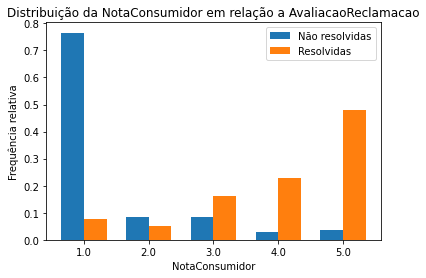

In [40]:
# Criando um gráfico para visualizar melhor

labels = list(df_resolvidas_rel_obs.index) #labels do gráfico de barras

x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras]

#construção do frame, criando figura e eixos
fig, ax = plt.subplots()

#valores para construção do gráfico de barras
rect1 = ax.bar(x - width/2, freq_nota[0], width, label='Não resolvidas')
rect2 = ax.bar(x + width/2, freq_nota[1], width, label='Resolvidas')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência relativa') # legenda eixo y
ax.set_xlabel('NotaConsumidor') # legenda eixo x
ax.set_title('Distribuição da NotaConsumidor em relação a AvaliacaoReclamacao') # titulo
ax.set_xticks(x) #s eta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() # legenda do gráfico
plt.show()


No gráfico vemos de uma maneira ainda melhor que há, sim uma dependência da 'NotaConsumidor' com a variável 'AvaliacaoReclamacao'

In [41]:
# Calculando Chi-Quadrado para verificar a hipótese.

# Distribuição geral da variável AvaliacaoReclamacao:
dist_ar = pd.DataFrame(round(df.AvaliacaoReclamacao.value_counts(),5))
dist_ar.sort_index(inplace=True)

# Excluindo as 'Não avaliadas'
dist_ar.drop('Não Avaliada', axis=0, inplace=True)

data = dist_ar.values/dist_ar.values.sum()
dict_data = {'Não Resolvida' : data[0], 'Resolvida' : data[1]}

dist_geral = pd.DataFrame(dict_data).T
dist_geral

,0
Não Resolvida,0.391239
Resolvida,0.608761


In [42]:
# Criando um dataframe e adicionando o total de cada linha na coluna 'total'.
df_ava = df.groupby('NotaConsumidor').apply(lambda x: x.AvaliacaoReclamacao.value_counts()).unstack()
df_ava_rel = df.groupby('NotaConsumidor').apply(lambda x: round(x.AvaliacaoReclamacao.value_counts()/x.shape[0],3)).unstack()

# Copiando o dataframe df_nota para os valores observados:
df_ava_obs = df_ava.copy()

# Adicionando a coluna total com a soma de cada linha
df_ava['Total'] = df_ava.loc[:5].sum(axis=1)
df_ava_rel['Total'] = df_ava_rel.loc[:5].sum(axis=1)

In [43]:
# Criando a tabela de valores esperados.
listaEsperado = []
for i in range(0, dist_geral.shape[0]):
    listaEsperado.append(dist_geral.values[i]*df_ava['Total'].values)

df_esperado = pd.DataFrame(listaEsperado).T

# Criando a tabela de valores observados.    
listaObservado = []
for i in range(0, df_ava_obs.shape[1]):
    listaObservado.append(df_ava_obs[df_ava_obs.T.index[i]].values)

df_observado = pd.DataFrame(listaObservado).T

In [44]:
# Calculando os desvios

desvios = pd.DataFrame((df_observado.values - df_esperado.values)**2)

desvios = pd.DataFrame(desvios.values / df_esperado.values)

# Calculando o Chi-Quadrado
chiQuadrado = desvios.sum().sum()

print('O chiQuadrado calculado é igual a %d.' %(chiQuadrado))

grausLiberdade = (desvios.shape[0] - 1) * (desvios.shape[1] - 1)

print('O número de graus de liberdade é: %d' %(grausLiberdade))

chiCritico = ss.chi2.ppf(1-.05, df=grausLiberdade)

print('O chiQuadrado crítico, para um grau de significância de 5 %% é de: %d' %(chiCritico))


O chiQuadrado calculado é igual a 15972.
O número de graus de liberdade é: 4
O chiQuadrado crítico, para um grau de significância de 5 % é de: 9


Como o valor chiQuadrado calculado é superior ao chiQuadrado crítico, percebemos que há um alto grau de correlação entre "AvaliacaoReclamacao" com "NotaConsumidor".

### Hipótese 2:
Verificar se a procura da empresa por parte do cliente tem alguma correlação com a nota do consumidor?
   - h0 = "ProcurouEmpresa" não tem relação direta com a "NotaConsumidor". (Hipótese nula)
   - h1 = "ProcurouEmpresa" tem relação direta com a "NotaConsumidor".  (Hipótese alternativa)

In [45]:
# Lendo o arquivo com os dados
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

# Configurando o pandas para mostrar todas as colunas do arquivo
pd.set_option('display.max_columns', None)

# Renomeando colunas
df.columns = ['Gestor', 'CanalOrigem', 'Regiao', 'UF', 'Cidade', 'Sexo', 'FaixaEtaria', 'AnoAbertura', 'MesAbertura', 'DataAbertura', 'HoraAbertura', 'DataResposta', 'HoraResposta', 'DataAnalise', 'HoraAnalise', 'DataRecusa', 'HoraRecusa', 'DataFinalizacao', 'HoraFinalizacao', 'PrazoResposta', 'PrazoAnaliseGestor', 'TempoResposta', 'NomeFantasia', 'SegmentoMercado', 'Area', 'Assunto', 'GrupoProblema', 'Problema', 'ComoComprouContratou', 'ProcurouEmpresa', 'Respondida', 'Situacao', 'AvaliacaoReclamacao', 'NotaConsumidor', 'AnaliseRecusa', 'EdicaoConteudo', 'InteracaoGestor', 'Total']

col_excluidas = ['DataAnalise', 'HoraAnalise', 'PrazoAnaliseGestor', 'AnaliseRecusa', 'DataRecusa', 'HoraRecusa']
for item in col_excluidas:
    df.drop(item, axis=1, inplace=True)

# Nova análise:
print("Total reclamações:", df.Total.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

print('\nO arquivo possui %d linhas e %d colunas.' %(df.shape[0], df.shape[1]))

# Filtrando os dados por nota
df_proc = df.groupby('ProcurouEmpresa').apply(lambda x: x.NotaConsumidor.value_counts()).unstack()
df_proc['Total'] = df_proc.sum(axis=1)

n_rel = df_proc.T['N'].values[:5]/df_proc['Total'].values[0]
s_rel = df_proc.T['S'].values[:5]/df_proc['Total'].values[1]

df_proc_rel = pd.DataFrame({'N' : n_rel, 'S' : s_rel}).T
df_proc_rel.columns = [1.0, 2.0, 3.0, 4.0, 5.0]

Total reclamações: 43987

Total de informação nula na base: 23272

Total de nulos por variável:
 NotaConsumidor         15360
DataResposta            2026
HoraResposta            2026
TempoResposta           2026
AvaliacaoReclamacao     1834
dtype: int64

Total de linhas completamente preenchidas: 28512

O arquivo possui 43987 linhas e 32 colunas.


In [46]:
# Imprimindo a tabela
df_proc

,1.0,2.0,3.0,4.0,5.0,Total
ProcurouEmpresa,,,,,,
N,736,158,299,340,961,2494
S,9168,1720,3448,3969,7828,26133


Aqui vemos que muitos clientes procuraram a empresa para resolver o problema. Apenas 9 % não procurou a empresa para resolver o problema.

In [47]:
# Frequência das notas para cada situação "Procurou ou Não Procurou" a empresa.
freq_nota = []

for item in df_proc_rel.index:
    freq_nota.append(df_proc_rel.T[item].values)

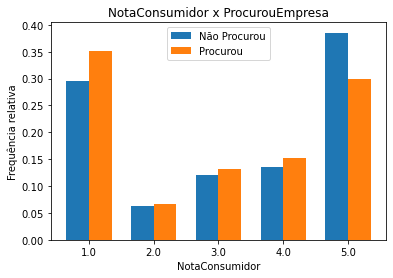

In [48]:
# Criando um gráfico para visualizar melhor

labels = list(df_proc_rel.T.index) #labels do gráfico de barras

x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras]

#construção do frame, criando figura e eixos
fig, ax = plt.subplots()

#valores para construção do gráfico de barras
rect1 = ax.bar(x - width/2, freq_nota[0], width, label='Não Procurou')
rect2 = ax.bar(x + width/2, freq_nota[1], width, label='Procurou')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência relativa') # legenda eixo y
ax.set_xlabel('NotaConsumidor') # legenda eixo x
ax.set_title('NotaConsumidor x ProcurouEmpresa') # titulo
ax.set_xticks(x) #s eta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() # legenda do gráfico
plt.show()

Não é possível dizer que haja relação entre "NotaConsumidor" e "ProcurouEmpresa" apenas observando o gráfico anterior. O gráfico mostra, relativamente, que tanto os que não procuraram, quanto os que procuraram a empresa deram notas bastante próximas.

In [49]:
# Calculando Chi-Quadrado para verificar a hipótese.

# Distribuição geral da variável ProcurouEmpresa:
dist_geral = pd.DataFrame(round(df.ProcurouEmpresa.value_counts()/df.ProcurouEmpresa.value_counts().sum(),2))
dist_geral.sort_index(inplace=False)

dist_geral

,ProcurouEmpresa
S,0.91
N,0.09


In [50]:
# Criando um dataframe e adicionando o total de cada linha na coluna 'total'.
df_proc1 = df.groupby('NotaConsumidor').apply(lambda x: x.ProcurouEmpresa.value_counts())
df_proc1_rel = df.groupby('NotaConsumidor').apply(lambda x: round(x.ProcurouEmpresa.value_counts()/x.shape[0],3))

# Copiando o dataframe df_nota para os valores observados:
df_proc1_obs = df_proc1.copy()

# Adicionando a coluna total com a soma de cada linha
df_proc1['Total'] = df_proc1.loc[:5].sum(axis=1)
df_proc1_rel['Total'] = df_proc1_rel.loc[:5].sum(axis=1)

In [51]:
# Criando a tabela de valores esperados.
listaEsperado = []
for i in range(0, dist_geral.shape[1]+1):
    listaEsperado.append(dist_geral.values[i]*df_proc1['Total'].values)

df_esperado = pd.DataFrame(listaEsperado).T

# Criando a tabela de valores observados.    
listaObservado = []
for i in range(0, df_proc1_obs.shape[1]):
    listaObservado.append(df_proc1_obs[df_proc1_obs.T.index[i]].values)

df_observado = pd.DataFrame(listaObservado).T

In [52]:
# Imprimindo a tabela de valores esperados
df_esperado

,0,1
0,9012.64,891.36
1,1708.98,169.02
2,3409.77,337.23
3,3921.19,387.81
4,7997.99,791.01


In [53]:
# Imprimindo a tabela de valores observados:
df_observado

,0,1
0,9168,736
1,1720,158
2,3448,299
3,3969,340
4,7828,961


In [54]:
# Calculando os desvios

desvios = pd.DataFrame((df_observado.values - df_esperado.values)**2)

desvios = pd.DataFrame(desvios.values / df_esperado.values)

# Calculando o Chi-Quadrado
chiQuadrado = desvios.sum().sum()

print('O chiQuadrado calculado é igual a %d.' %(chiQuadrado))

grausLiberdade = (desvios.shape[0] - 1) * (desvios.shape[1] - 1)

print('O número de graus de liberdade é: %d' %(grausLiberdade))

chiCritico = ss.chi2.ppf(1-.05, df=grausLiberdade)

print('O chiQuadrado crítico, para um grau de significância de 5 %% é de: %d' %(chiCritico))


O chiQuadrado calculado é igual a 81.
O número de graus de liberdade é: 4
O chiQuadrado crítico, para um grau de significância de 5 % é de: 9


O valor de chiQuadrado calculado é superior ao valor crítico, isso significa que para um grau de significância de 5%, existe uma relação entre "ProcurouEmpresa" e "NotaConsumidor". Entretando, vale notar que o valor de chiQuadrado para esse caso é muito inferior àqueles calculados anteriormente, como por exemplo o chiQuadrado para a correlação entre "NotaConsumidor" e "TempoResposta" (igual a 1259)) e para a correlação entre "AvaliacaoReclamacao" e "NotaConsumidor" (igual a 15972). Sendo assim, caso fossemos utilizar um parâmetro para prever o comportamento da variável "NotaConsumidor", a variável "AvaliacaoReclamacao" seria a mais indicida, já que apresenta o maior índice chiQuadrado.

# Dúvidas

Algumas dúvidas surgiram enquanto eu fazia os exercícios, não sei se pode me dar um retorno quanto a isso também. De qualquer forma, vou colocá-las aqui embaixo, mas se não puder me dar um retorno sobre elas especificamente, entendo perfeitamente.

**D1. Exercício 3 - Parte 3:**

Há duas hipóteses:

 - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
 - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)
 
Das quais devemos verificar qual é atendida. No exercício, calculei um valor de chi-quadrado igual a 1200, aproximadamente, enquanto o chi-quadrado crítico para o problema (α= 0,05 e 52 graus de liberdade) é de 69. Pelo que me lembro, quando o valor encontrado é superior ao “crítico”, estamos na região de rejeição e a hipótese nula é descartada. Nesse caso, isso me diria que o tempo de resposta não tem relação direta com a nota do consumidor.

Claro, se todos os cálculos que fiz estiverem certos, até aí tudo bem. Estudei um pouco mais sobre como declarar (ou determinar) as hipóteses e percebi que na grande maioria dos casos, quando se trata de uma verificação de relação entre dois parâmetros, a hipótese de nulidade é ao contrário da que foi dada no exercício (h0 seria igual a: o tempo de resposta não tem relação direta com a nota do consumidor), o que me levaria para o outro caminho e que bate com o que foi dito na aula (que quanto maior o valor de chi-quadrado, maior a relação entre as variáveis).

No exercício 3, inverti as duas hipóteses e considerei dessa última forma que comentei. Está correto? Existe alguma forma diferente de analisar quando as hipóteses estão invertidas? Se sim, como fazê-la? Poderia me indicar um material para o estudo desse assunto?

**D2. Exercício 3 - Parte 5:**

É pedido para gerar pelo menos mais duas análises. 

A minha primeira análise foi verificar se há uma relação entre “Avaliação da Reclamação” e “Nota do Consumidor”. Para isso, criei duas hipóteses:

 - h0 = “Avaliação da Reclamação” não tem relação direta com “Nota do Consumidor”
 - h1 = “Avaliação da Reclamação” tem relação direta com “Nota do Consumidor”
 
Pelo gráfico que gerei, e também pelos próprios dados filtrados (a não ser que tenha feito errado) fica muito claro que as maiores notas são daquelas que possuem “Avaliação da Reclamação” como “Resolvida”, enquanto as menores notas são aquelas que apresentam como “Não Resolvida”.

Até aí tudo bem, calculei o chi-quadrado e verifiquei que o valor é igual a 15972, enquanto o chi-quadrado “crítico” (α= 0,05 e 4 graus de liberdade) é de 9. Isso me diz que estou na região de rejeição e a hipótese de nulidade é descartada. Assim, para esse caso, “Avaliação da Reclamação” teria relação direta com “Nota do Consumidor”. Essa solução está correta?

Agradeceria muito um retorno quanto a isso, mas entendo se não for de sua responsabilidade responder esse tipo de dúvida. Muito obrigado pela atenção até aqui.